In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import warnings
warnings.filterwarnings("ignore")

# Context

In this tutorial, we are using sample data from Unbounce. Unbounce is a subscription-based tool that helps marketers to publish and optimize landing pages for a high conversion rate.  

For this tutorial, the data includes events and subscription information for 4 accounts. No personal information is included, and account unique identifications have been changed to ensure security.

# Load Data

Customer behavior data usually includes date and time events, the moments when customers do a particular action. In this tutorial, we will look into events for account republish (`republished_df`) and login (`login_df`). 

We also have subscription information for each customer (`subscription_info_df`). A customer can have multiple subscriptions, but each subscription is mutually exclusive. A new subscription for a customer only starts when he/she churns (meaning stop paying) then re-subscribe. We call this person a flapper.

In [2]:
republished_df = pd.read_csv("../data/republished_sample.csv")
login_df = pd.read_csv("../data/login_sample.csv")
subscription_info_df = pd.read_csv("../data/subscription_info.csv")

In [3]:
republished_df.head()

,AccountCode,action_date
0,a,2019-02-04
1,a,2019-02-04
2,a,2019-02-04
3,a,2019-02-04
4,a,2019-02-04


In [4]:
login_df.head()

,AccountCode,action_date
0,a,2019-02-04
1,a,2019-02-04
2,a,2019-02-05
3,a,2019-02-05
4,a,2019-02-06


In [5]:
subscription_info_df.head()

,AccountCode,subscription_starts_at,subscription_ends_at
0,a,2019-02-04,2019-05-24
1,a,2019-05-29,2019-07-17
2,a,2019-08-12,2019-10-30
3,a,2019-10-30,NaN
4,b,2019-03-14,2019-05-01


# Transform Data

Before going into the visualization, we need to transform date columns to date-time format. Right now, Python thinks that they are a bunch of strings. Hence, the dates will not be arranged in a timely order.

In [6]:
republished_df['action_date'] = pd.to_datetime(republished_df['action_date'])
login_df['action_date'] = pd.to_datetime(login_df['action_date'])
subscription_info_df['subscription_starts_at'] = pd.to_datetime(subscription_info_df['subscription_starts_at'])
subscription_info_df['subscription_ends_at'] = pd.to_datetime(subscription_info_df['subscription_ends_at'])

In [7]:
sample_subscription = subscription_info_df[subscription_info_df['AccountCode'] == 'a']
sample_republished = republished_df[republished_df['AccountCode'] == 'a']
sample_login = login_df[login_df['AccountCode'] == 'a']

# this is a constant for visualization purpose
sample_subscription['vizline'] = 0.5
sample_republished['vizline'] = 0.5
sample_login['vizline'] = 0.5

# Visualize


## **TIP #1:  Is this account a same-day flapper? Let's mix some colors!** 

**This tip is handy when we need to visualize different events that only happen once, but they may happen on the same day**.

Like any subscription-based company, Unbounce expects flappers -- subscribers who subscribe, churn, then come back at some point in time. There are cases when churn and re-subscription happen on the **same** date. To distinguish same-day flappers, we can use this color mixing trick. 

*Note: we assume here that each subscription is mutually exclusive to another.*

If we visualize `subscription start date` with a different color than `subscription end date` and use some opacity level, we will have a different color for same-day flappers.

For example, here I choose **blue** for `subscription start date` and **red** for `subscription end date`, and change opacity level through `alpha = 0.5` (`alpha` ranges from 0 to 1). This results in **magenta** for same-day flappers.

You can learn more about basic of color mixing through this article: https://mymodernmet.com/color-mixing-chart/.

Here is a list of color codes in Matplotlib: https://matplotlib.org/examples/color/named_colors.html

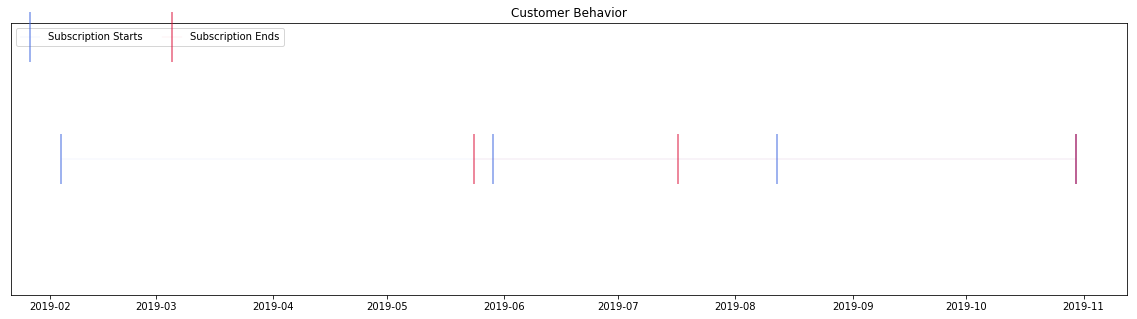

In [8]:
fig, ax = plt.subplots(figsize=(20, 5))

ax.plot(sample_subscription['subscription_starts_at'], sample_subscription['vizline'], 
        marker='|', linewidth = 0.1,
        markersize=50, mew=2, alpha=0.5,
        color='royalblue', label='Subscription Starts')

no_expire_mask = ~sample_subscription['subscription_ends_at'].isnull()
ax.plot(sample_subscription[no_expire_mask]['subscription_ends_at'], sample_subscription[no_expire_mask]['vizline'],
        linewidth = 0.1, marker='|',
        markersize=50, mew=2, alpha=0.5,
        color='crimson', label='Subscription Ends')

ax.legend(loc='upper left', ncol=2)
ax.set_title("Customer Behavior")

# Remove y-axis ticks as we don't need it
ax.get_yaxis().set_visible(False)

From the chart above, we know that this account is a flappers with 4 subscriptions. On the last subscription, he/she is a same-day flapper. The last subscription started when the 3rd one ended, and thus we see magenta instead of blue or red here.

Besides colors and alpha, there are more parameters in `axes.plot()` function that you can play around depending on how you want to design your chart, such as type of marker and marker size (we will go into more details for `marker` in the next tip). 

Read more about these parameters here: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.plot.html

## **TIP #2: What is the frequency and intensity of each action? Let's use different shapes and opacity level**

**This tip is handy when we need to visualize different events that can happen multiple times on the same day.**

Because Unbounce is a tool that helps marketers to publish and optimize their landing pages, we care about republish events. We want to understand:
* How often do customers republish their page as compare to login to the tool?
* How much/intensively do customers republish each time they login?

To help answer these questions, we need to plot login and republish on the same chart. There are 2 problems with this:
* Customers can login and republish on the same day
* Customers can do these actions many times on the same day

And to solve these problems, we can use different shapes (through `marker`) and opacity levels (through `alpha`) in `axes.plot()` function. There are many marker types, but here I use *circles* for logins and *triangles* for republishes. You can find out other types here: https://matplotlib.org/3.1.1/api/markers_api.html#module-matplotlib.markers.

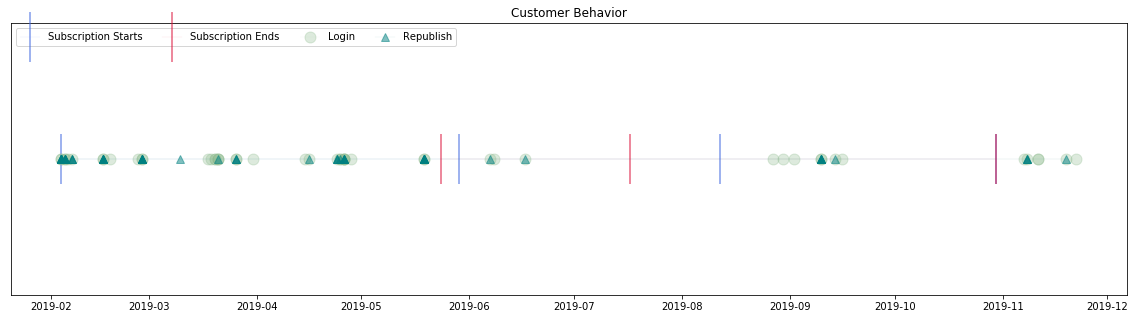

In [9]:
fig, ax = plt.subplots(figsize=(20, 5))

# Plot subscription starts and ends
ax.plot(sample_subscription['subscription_starts_at'], sample_subscription['vizline'], 
        marker='|', linewidth = 0.1,
        markersize=50, mew=2, alpha=0.5,
        color='royalblue', label='Subscription Starts')

no_expire_mask = ~sample_subscription['subscription_ends_at'].isnull()
ax.plot(sample_subscription[no_expire_mask]['subscription_ends_at'], sample_subscription[no_expire_mask]['vizline'],
        linewidth = 0.1, marker='|',
        markersize=50, mew=2, alpha=0.5,
        color='crimson', label='Subscription Ends')

# Plot login and republish events
ax.plot(sample_login['action_date'], sample_login['vizline'],
        marker='o', markersize=11,
        alpha=0.3, color='darkseagreen',
        linewidth=0.1, label='Login')

ax.plot(sample_republished['action_date'], sample_republished['vizline'],
        marker='^', markersize=8,
        alpha=0.5, color='teal',
        linewidth=0.1, label='Republish')

ax.legend(loc='upper left', ncol=4)
ax.set_title("Customer Behavior")

ax.get_yaxis().set_visible(False)

From the chart above, we can answer the two behavior questions:
* **How often do customers republish their page as compare to login to the tool?** -- During the first subscription, this customer logged in and republished almost every 2 weeks, but this frequency has reduced in following subscriptions. There are times that they logged in without republishing a page.

* **How often do customers republish their page as compare to login to the tool?** -- During all subscriptions, this account tends to republish many times when they logged in, hence we see darker-colored triangles. This suggests that they may republish every time they make changes to preview the page.

## TIP #3: How is this account behavior compared to another's? Let's make sure we look at the same scale

**This tip is especially handy when you want to compare one entity to another.**

If we only look into one customer, we don't know whether this customer is a highly-engaged one, or whether this is a norm for all of our customer base. 

Although there are other statistical methods to check on customer behavior trends (especially when you have more customers than you can manually check), we can start by visualizing the behavior of different customers and compare them together. I like this method as an exploratory analysis. Because besides talking to customer-facing teams, this helps suggest hypotheses to confirm/deny with statistical models later on.

To make a more reasonable comparison, we want to make sure charts use the same scale. There can be customers who start their subscriptions early in the year, while some others start mid-year or end of the year. In this case, I want to limit my chart to show a date range from January 1st to December 31st. We can use `axes.set_xlim()` function for this.

Read more about `axes.set_xlim()` here: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.set_xlim.html

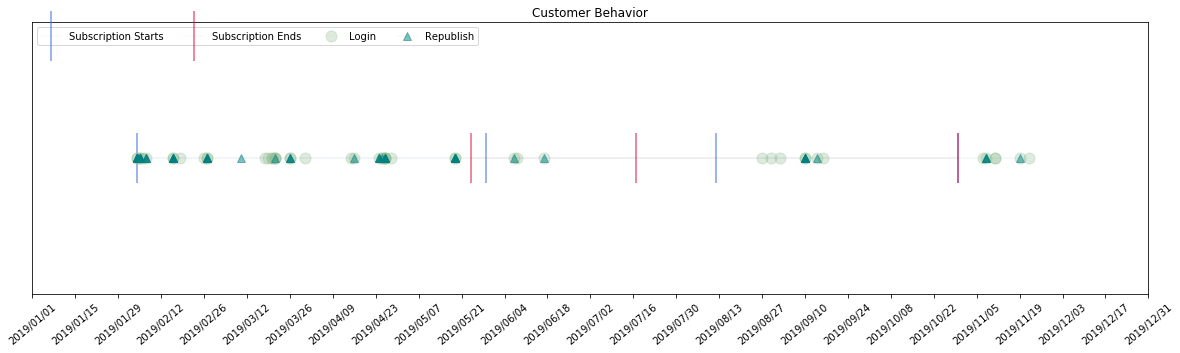

In [10]:
fig, ax = plt.subplots(figsize=(20, 5))

# Plot subscription starts and ends
ax.plot(sample_subscription['subscription_starts_at'], sample_subscription['vizline'], 
        marker='|', linewidth = 0.1,
        markersize=50, mew=2, alpha=0.5,
        color='royalblue', label='Subscription Starts')

no_expire_mask = ~sample_subscription['subscription_ends_at'].isnull()
ax.plot(sample_subscription[no_expire_mask]['subscription_ends_at'], sample_subscription[no_expire_mask]['vizline'],
        linewidth = 0.1, marker='|',
        markersize=50, mew=2, alpha=0.5,
        color='crimson', label='Subscription Ends')

# Plot login and republish events
ax.plot(sample_login['action_date'], sample_login['vizline'],
        marker='o', markersize=11,
        alpha=0.3, color='darkseagreen',
        linewidth=0.1, label='Login')

ax.plot(sample_republished['action_date'], sample_republished['vizline'],
        marker='^', markersize=8,
        alpha=0.5, color='teal',
        linewidth=0.1, label='Republish')

# Limit date range
datemin = pd.to_datetime('2019/01/01').date()
datemax = pd.to_datetime('2019/12/31').date()
ax.set_xlim(datemin, datemax)

# Show weekly date
date_form = mdates.DateFormatter("%Y/%m/%d")
ax.xaxis.set_major_formatter(date_form)
# Ensure ticks fall once every other week (interval=2) 
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
ax.xaxis.set_tick_params(rotation=40)

ax.legend(loc='upper left', ncol=4)
ax.set_title("Customer Behavior")

ax.get_yaxis().set_visible(False)

# TIP #4: Make it reproducible

I'm a big fan of the rule of three inspired by [David Robinson](http://varianceexplained.org/r/ds-ml-ai/).
> When you’ve written the same code 3 times, write a function

Since we're going to visualize the behavior of 4 customers in the dataset (obviously this is more than 3), I want to write a function. I love functions because we can make systematic changes to visualizations and save so much time copy-pasting those changes to each chart.

In [11]:
def _get_sample_data(AccountCode):
    """This function gets subscription info, login events and republish events for the AccountCode input.
    
    Args:
        AccountCode (str): Account unique identification.

    Returns:
        pandas.core.frame.DataFrame: 3 dataframes with subscription info, login and republish events.
    """
    sample_subscription = subscription_info_df[subscription_info_df['AccountCode'] == AccountCode]
    sample_republished = republished_df[republished_df['AccountCode'] == AccountCode]
    sample_login = login_df[login_df['AccountCode'] == AccountCode]

    # this is a constant for visualization purpose
    sample_subscription['vizline'] = 0.5
    sample_republished['vizline'] = 0.5
    sample_login['vizline'] = 0.5
    
    return sample_subscription, sample_republished, sample_login

In [12]:
def _visualize_customer_behavior(AccountCode):
    """This function visualizes customer behavior using subscription, login and republish events of a customer.
    
    Args: 
        AccountCode (str): Account unique identification.
        
    Returns:
        matplotlib.figure.Figure: a visualization with subscription, login and republish events of a customer.
    """
    sample_subscription, sample_republished, sample_login = _get_sample_data(AccountCode)
    
    fig, ax = plt.subplots(figsize=(20, 5))

    # Plot subscription starts and ends
    ax.plot(sample_subscription['subscription_starts_at'], sample_subscription['vizline'], 
            marker='|', linewidth = 0.1,
            markersize=50, mew=2, alpha=0.5,
            color='royalblue', label='Subscription Starts')

    no_expire_mask = ~sample_subscription['subscription_ends_at'].isnull()
    ax.plot(sample_subscription[no_expire_mask]['subscription_ends_at'], sample_subscription[no_expire_mask]['vizline'],
            linewidth = 0.1, marker='|',
            markersize=50, mew=2, alpha=0.5,
            color='crimson', label='Subscription Ends')

    # Plot login and republish events
    ax.plot(sample_login['action_date'], sample_login['vizline'],
            marker='o', markersize=11,
            alpha=0.3, color='darkseagreen',
            linewidth=0.1, label='Login')

    ax.plot(sample_republished['action_date'], sample_republished['vizline'],
            marker='^', markersize=8,
            alpha=0.5, color='teal',
            linewidth=0.1, label='Republish')

    # Limit date range
    datemin = pd.to_datetime('2019/01/01').date()
    datemax = pd.to_datetime('2019/12/31').date()
    ax.set_xlim(datemin, datemax)

    # Show weekly date
    date_form = mdates.DateFormatter("%Y/%m/%d")
    ax.xaxis.set_major_formatter(date_form)
    # Ensure ticks fall once every other week (interval=2) 
    ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
    ax.xaxis.set_tick_params(rotation=40)

    ax.legend(loc='upper left', ncol=4)
    ax.set_title("Customer Behavior")

    ax.get_yaxis().set_visible(False)
    
    return fig

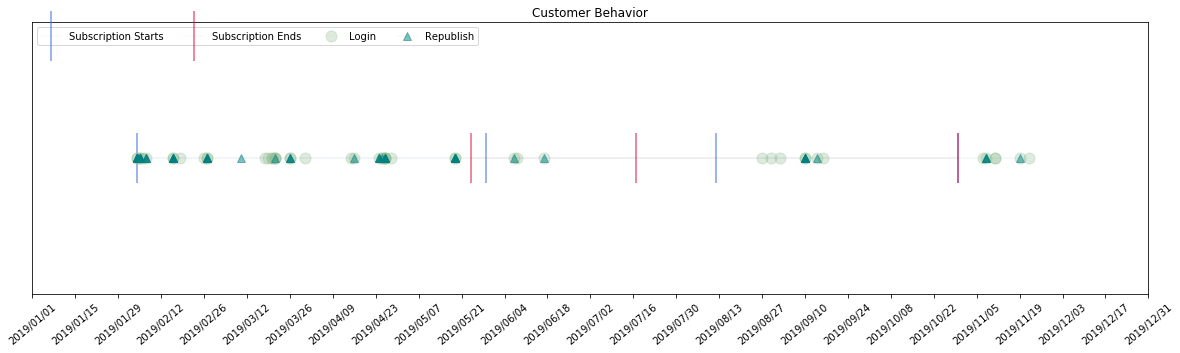

In [13]:
_ = _visualize_customer_behavior('a')

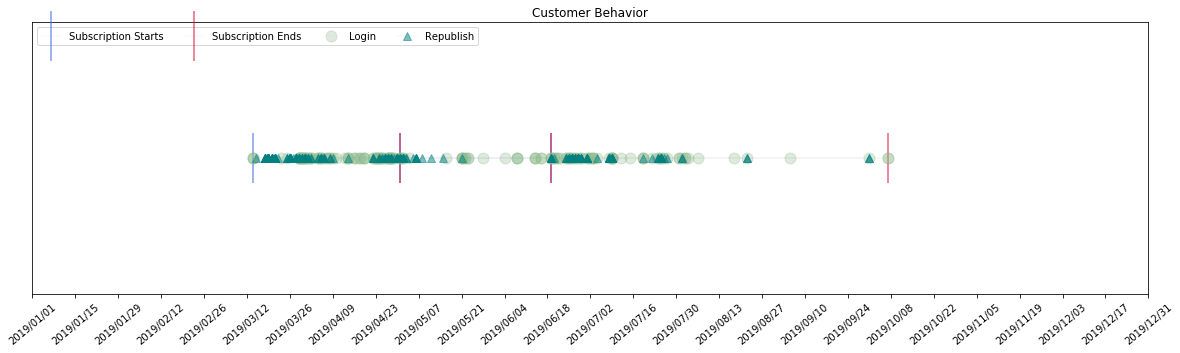

In [14]:
_ = _visualize_customer_behavior('b')

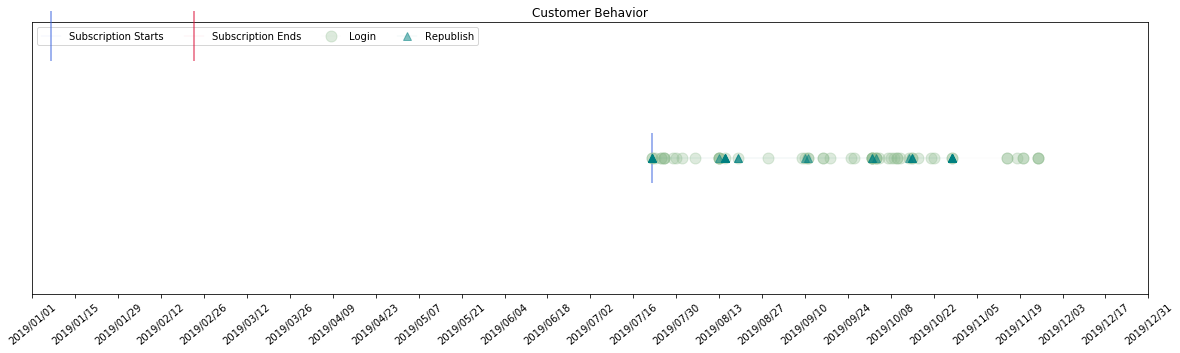

In [15]:
_ = _visualize_customer_behavior('c')

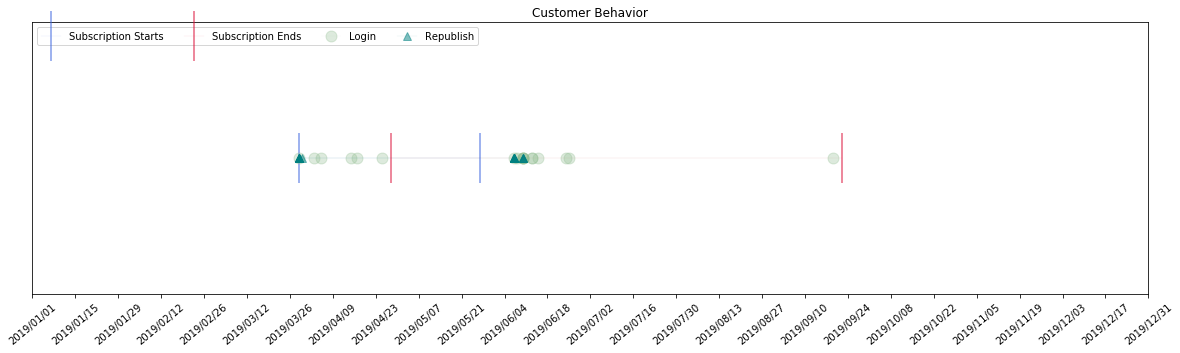

In [16]:
_ = _visualize_customer_behavior('d')